In [1]:
!pip install --quiet torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.5 MB/s eta 0:00:00


In [22]:
import torch
import numpy as np

from torchviz import make_dot #for computional graph
from IPython.display import display, Math, Latex #for display

for c in [torch, np]:
  print(c.__version__)

2.6.0+cu124
2.0.2


# linear regression
$$y = \textbf{w}^T \textbf{x} + b$$
* affine TF (not linear transform)
* 우리의 관심은 w임. 관점도 w 입장에서.
* 위 식은inner product 형태

# fahrenheit VS. celsius
from fahrenheit(x) ro celsius(x)
$$ y = 1.8 \times x + 32 $$

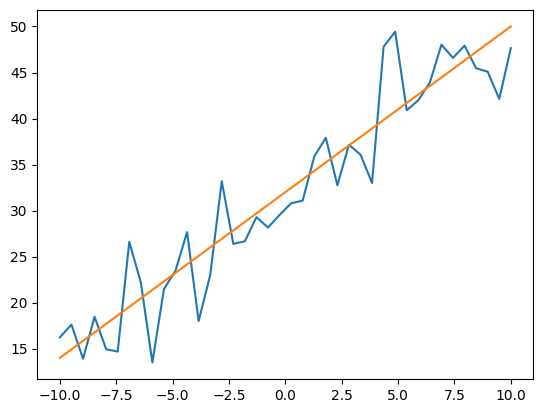

In [23]:
x = np.linspace(-10,10, 40)
y_ideal = 1.8 * x + 32.
y = y_ideal + 4.*np.random.randn((40))

import matplotlib.pyplot as plt
plt.plot(x,y, x,y_ideal)

In [24]:
y = torch.tensor(y).float()
x = torch.tensor(x).float()

print(y.dtype, y.shape)
print(x.dtype, x.shape)

torch.float32 torch.Size([40])
torch.float32 torch.Size([40])


In [25]:
tmp = torch.tensor((7.0))
tmp.dtype, tmp.size(), tmp.ndim
# 이건 스칼라가 아니므로,브로드캐스팅에서 문제 생길 수 있음

(torch.float32, torch.Size([]), 0)

# model & loss func.
custom func.으로
* linear model& loss func. 생성

In [26]:
def juy_linear_model (x, w, b):
  ret_v = w * x + b
  return ret_v
  # return w * x + b

In [27]:
def loss_fnc (pred, label):
  mse = ((pred - label)**2).mean()
  return mse
# mse 는 mean scare? error임

# init model's parameters
linear model에서는 기울기와 절편만을 파라메터로 가짐.

* `w`
* `b`

이를 1과 0으로 초기화.(초기화는 중요함)


In [31]:
w = torch.ones(())  # 빈 튜플을 통해 scalar에 해당하는 tensor 생성.
b = torch.zeros(())

In [32]:
w.shape, b.shape

(torch.Size([]), torch.Size([]))

In [33]:
w, b

(tensor(1.), tensor(0.))

# model test:prediction
현재의 초기화된 linear model로 prediction or inference 수행해서, 정상동작 하는지 확인해야함.

In [36]:
x.dtype, w.dtype, b.dtype

(torch.float32, torch.float32, torch.float32)

In [37]:
pred = juy_linear_model(x ,w, b)
pred

tensor([-10.0000,  -9.4872,  -8.9744,  -8.4615,  -7.9487,  -7.4359,  -6.9231,
         -6.4103,  -5.8974,  -5.3846,  -4.8718,  -4.3590,  -3.8462,  -3.3333,
         -2.8205,  -2.3077,  -1.7949,  -1.2821,  -0.7692,  -0.2564,   0.2564,
          0.7692,   1.2821,   1.7949,   2.3077,   2.8205,   3.3333,   3.8462,
          4.3590,   4.8718,   5.3846,   5.8974,   6.4103,   6.9231,   7.4359,
          7.9487,   8.4615,   8.9744,   9.4872,  10.0000])

# loos func. :test

loss func. 정상동작 하는지 확인하기 위해,

1의 차이가 나는 pred와 label을 test용으로 만들어 입력 후, 확인.

In [39]:
l = loss_fnc(pred+1,pred)
l.dtype, l

(torch.float32, tensor(1.))

## PyTorch's loss function 기능.

* `nn.MSELoss`는 클래스로 다음으로 instance를 생성.  
  * `mse_loss_fn = nn.MSELoss()` 로 object를 생성해야 함.
* 생성된 객체는 `__call__()` 메서드 덕분에 함수처럼 사용 가능 (callable).
* PyTorch에서는 대부분의 손실 함수가 이런 식으로 설계되어 있음 (`nn.CrossEntropyLoss`, `nn.L1Loss` 등도 동일한 구조).

In [70]:
import torch
import torch.nn as nn

# 예측값과 실제값 정의
pred = torch.tensor([2.0, 3.0, 4.0], requires_grad=True) #loss func.의 시작점에서 부터 볼 수 있게
target = torch.tensor([1.0, 2.0, 3.0])

# nn.MSELoss 인스턴스 생성 (callable)
mse_loss_fn = nn.MSELoss()

# type 출력
print(f"타입: {type(mse_loss_fn)}")  # <class 'torch.nn.modules.loss.MSELoss'>
print("nn.MSELoss는 클래스이며, 생성된 객체는 함수처럼 호출 가능합니다.\n")

# 1. nn.MSELoss 사용
loss_nn = mse_loss_fn(pred, target)

# 2. 직접 구현한 MSE Loss
loss_custom = ((pred - target) ** 2).mean() #expression으로 만들어서

# 결과 비교 출력
print(f"nn.MSELoss 결과:       {loss_nn.item():.4f}") #사용할 때는 반드시 사이즈가 하나인 즉, 단일값 하나 뽑을 때만.
print(f"직접 구현한 MSE 결과: {loss_custom.item():.4f}") #위에 라인과 이 라인에 있는 :.4f는 소수점 4자리까지를 의미함.

# gradient 비교
# 먼저 nn.MSELoss 결과에 대해 backward 수행
# retain_graph=True는 같은 computational graph를 유지하여 두 번째 backward도 가능하게 함
# (그래프가 기본적으로는 backward 후 사라지므로(초기화되기 때문) 두 번 이상 사용할 땐 꼭 필요함)
pred.grad = None
loss_nn.backward(retain_graph=True)
grad_nn = pred.grad.clone()

# 다음, 직접 구현한 손실에 대해 backward
pred.grad = None
loss_custom.backward()
grad_custom = pred.grad.clone()

# 결과 출력
print(f"\nnn.MSELoss의 gradient: {grad_nn}")
print(f"직접 구현한 gradient:   {grad_custom}")
print(f"\n두 gradient가 동일한가? {torch.allclose(grad_nn, grad_custom)}")
#GPU에서는 연산 중 소수점에서의 미세한 오류가 생기기도 함. so, 다르게나오기도함
#이러한 에러를 고려해서 연산하고 비교하기 위해 allclose 사용

타입: <class 'torch.nn.modules.loss.MSELoss'>
nn.MSELoss는 클래스이며, 생성된 객체는 함수처럼 호출 가능합니다.

nn.MSELoss 결과:       1.0000
직접 구현한 MSE 결과: 1.0000

nn.MSELoss의 gradient: tensor([0.6667, 0.6667, 0.6667])
직접 구현한 gradient:   tensor([0.6667, 0.6667, 0.6667])

두 gradient가 동일한가? True


# gradientdescent algorithm
numerical method로

`w, b`에 대한 gradient 계산

### weights

$$ w_{t+1} = w_{t} - \eta \nabla_{w} L(w_t, X, Y)$$

$$\begin{align}\nabla_{w} L(w_t, X, Y) &= \frac{ \partial L(w_t, X, Y)}{
  \partial w} \\ &\approx \frac{L(w_t + \delta, X, Y) - L(w_t - \delta, X, Y)}{2\delta} \end{align}$$

* X,Y가 대문자인 이유는 matrix or vector임을 의미함

In [71]:
delta = 0.1
lr = 1e-3 # 0.001

d_loss_d_w = (
    (loss_fnc(juy_linear_model(x, w+delta, b), y)
     - loss_fnc(juy_linear_model(x, w-delta, b), y))
    / (2. * delta))

tmp = d_loss_d_w.detach().numpy()
print(tmp)
print(f"{tmp = }")
print("---------------------")

display( Math(r'\frac{ \partial L(w_t, X, Y)}{\partial w} \approx'+ str(tmp)))
#display( Math(r'\frac{ \partial L(w_t, X, \textbf{y})}{\partial w} \approx'+ str(tmp)))

-50.46875
tmp = array(-50.46875, dtype=float32)
---------------------


<IPython.core.display.Math object>

### bais

$$ b_{t+1} = b_{t} - \eta \nabla_{b} L(b_t, X, Y)$$

$$\begin{align}\nabla_{b} L(b_t, X, Y) &= \frac{ \partial L(b_t, X, Y)}{
  \partial b} \\ &\approx \frac{L(b_t + \delta, X, Y) - L(b_t - \delta, X, Y)}{2\delta} \end{align}$$

In [72]:
d_loss_d_b = (
    (loss_fnc(juy_linear_model(x, w, b+delta), y)
     - loss_fnc(juy_linear_model(x, w, b-delta), y))
    / (2. * delta))

tmp = d_loss_d_b.detach().numpy()
print(tmp)
print(f"{tmp = }")
print("---------------------")

display( Math(r'\frac{ \partial L(b_t, X, Y)}{\partial b} \approx'+ str(tmp)))
#display( Math(r'\frac{ \partial L(b_t, X, \textbf{y})}{\partial b} \approx'+ str(tmp)))

-63.19336
tmp = array(-63.19336, dtype=float32)
---------------------


<IPython.core.display.Math object>

확실히 교수님의 코드 속 결과물과 미세한 차이가 보이네

### update parameters

In [73]:
w = w - lr * d_loss_d_w
b = b - lr * d_loss_d_b

w,b

(tensor(1.1047), tensor(0.1265))

In [74]:
print(f'current loss: {l=}')
pred = juy_linear_model(x,w,b)
l_new = loss_fnc(pred, y)
print(f'new loss: {l_new=}')

current loss: l=tensor(1.)
new loss: l_new=tensor(1024.3199)


---

# Analytical Derivatives

앞서 구한 numerical method 대신에,  

MSE에 대한 gradient를 계산

$$ \begin{aligned}L &= (\hat{y} - y)^2 \\&= (wx+b -y)^2  \\ \hat{y}&=wx+b\end{aligned}$$

이 loss func. 를 parameters `w`, `b`에 대해 partial derivative를 다음과 같이 구할 수 있음.


$$ \begin{aligned}\frac{\partial L}{\partial w} &= \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial w}\\  \frac{\partial L}{\partial b} &= \frac{\partial L}{\partial \hat{y}}\frac{\partial \hat{y}}{\partial b}\end{aligned}$$

chain rule에 의해 구하기 위한 내용은 다음과 같음.

$$\begin{aligned}
\frac{\partial L}{\partial \hat{y}} &= 2(\hat{y}-y) \\\\  
 \frac{\partial \hat{y}}{\partial w} &= x \\\\ \frac{\partial \hat{y}}{\partial b} &= 1  
\end{aligned}\$$

In [75]:
def anal_d_loss_d_pred(pred,y):
  ret_v = 2. *(pred-y)
  return ret_v

def anal_d_pred_d_w(x, w, b):
  return x

def anal_d_pred_d_b(x, w, b):
  return 1.

gradient는 다음과 같다.
$$
\nabla L = \begin{bmatrix} \frac{dL}{dw} \\
\frac{dL}{db} \end{bmatrix}$$

In [76]:
def get_grad(x, y, pred, w, b):
  v_d_loss_d_pred = anal_d_loss_d_pred(pred, y)
  v_d_loss_d_w = v_d_loss_d_pred * anal_d_pred_d_w(x,w,b)
  v_d_loss_d_b = v_d_loss_d_pred * anal_d_pred_d_b(x,w,b)

  return torch.stack([v_d_loss_d_w.mean(), v_d_loss_d_b.mean()])

이것으로 초기값의 파라미터에 대한 linear model에서 loss 구하고,

gradient를 구하는 과정을 test한 것임

In [77]:
w_init = 1
b_init = 0

preds = juy_linear_model(x, w_init, b_init)
loss = loss_fnc(preds, y)
grad = get_grad(x, y, preds, w_init, b_init)

display(f'{grad=}')

'grad=tensor([-54.2723, -63.3194])'

# training
앞에서 구한 값들을 바탕으로 training 구현함

In [83]:
def juy_linear_model(x, w, b):
    return x * w + b

# MSE 손실 함수 정의
def loss_fnc(pred, y):
    return torch.mean((pred - y) ** 2)

# 기울기 계산 함수 (선형 회귀의 경우)
def get_grad(x, y, pred, w, b):
    grad_w = 2 * torch.mean((pred - y) * x)
    grad_b = 2 * torch.mean(pred - y)
    return grad_w, grad_b

# 훈련 함수
def juy_training(x, y, model, _w, _b, n_epoch, lr, log_flag=False):
    w, b = _w, _b

    for epoch in range(n_epoch):
        pred = model(x, w, b)  # 예측값 계산

        # 손실 값 계산
        l = loss_fnc(pred, y)

        # 손실 값이 무한대로 커지면 학습 종료
        if torch.isinf(l).any():
            print('Error: loss is infinity.')
            print(f'{epoch=}')
            break

        # 기울기 계산
        grad = get_grad(x, y, pred, w, b)

        # 가중치와 편향 업데이트
        w = w - lr * grad[0]
        b = b - lr * grad[1]

        # 로그 출력
        if epoch in [0, 1, 2, 3, 4, 5, 100, 1000, 2000, 3000, 4000, 5000]:
            print(f'Epoch {epoch}: Loss {float(l):0.4f}')
            if log_flag:
                print(f'{w=}, {b=}')
        elif epoch in [6, 101, 1001, 2001, 3001, 4001, 5001]:
            print('---')

    return w, b

In [85]:
# 훈련 수행
w_n, b_n = juy_training(
    x, y, juy_linear_model,
    torch.ones(()),  # 초기 w
    torch.zeros(()),  # 초기 b
    7000,  # 에폭 수
    lr=1e-3,  # 학습률
)
w_n, b_n

Epoch 0: Loss 1025.0461
Epoch 1: Loss 1020.9318
Epoch 2: Loss 1016.8342
Epoch 3: Loss 1012.7529
Epoch 4: Loss 1008.6881
Epoch 5: Loss 1004.6397
---
Epoch 100: Loss 685.7787
---
Epoch 1000: Loss 18.9508
---
Epoch 2000: Loss 0.6275
---
Epoch 3000: Loss 0.2867
---
Epoch 4000: Loss 0.2803
---
Epoch 5000: Loss 0.2802
---


(tensor(1.8219), tensor(31.9632))

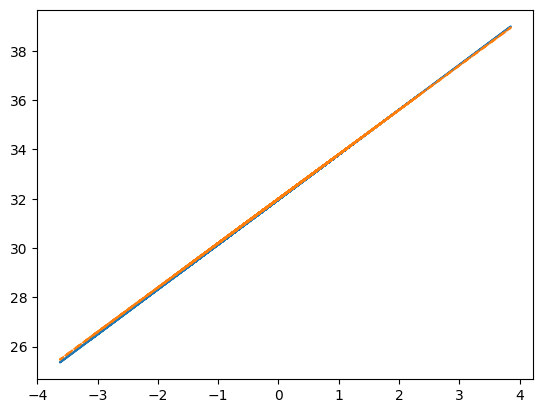

In [89]:
# 모델 예측값 계산
pred = juy_linear_model(x, w_n, b_n)

# 이상적인 y 값 (y_ideal) 계산
y_ideal = 1.8 * x + 32

# 시각화
plt.plot(x.numpy(), pred.numpy(), label='Model Prediction')
plt.plot(x.numpy(), y_ideal.numpy(), label='Ideal Line (y = 1.8 * x + 32)', linestyle='--')
#----------------
#pred = ds_linear_model(x, w_n, b_n)

#plt.plot(x, pred, x, y_ideal, x, y)

# torch's autograd
앞서 analytical method로 직접 gradient를 구하기 위한 partial derivatives를 구현한 방식이 아닌,  
PyTorch의 AutoGrad를 이용한 구현은 다음과 같음.

In [90]:
params = torch.tensor(
    [1., 0.],
    requires_grad = True
)

if params.grad is None:
  print('"grad" attributes \'s default is None.')

"grad" attributes 's default is None.


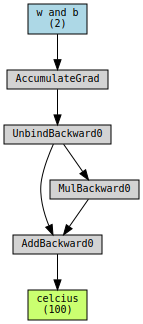

In [92]:
pred = juy_linear_model(x, *params)
cg = make_dot(pred, params = {'w and b': params, 'celcius': pred })
display(cg)

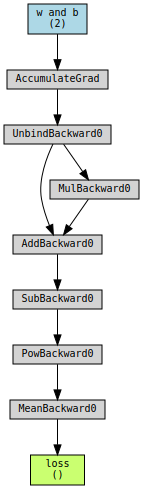

In [94]:
l = loss_fnc(pred, y)
cg = make_dot(l, params={'loss': l, 'w and b': params})
display(cg)

In [95]:
l.backward()
params.grad

tensor([ -4.7600, -63.9983])

한번 업데이트로 grad를 inpplace 연산을 통해 0으로 초기화하는 과정

In [96]:
if params.grad is not None:
  params.grad.zero_()
  params.grad

In [106]:
def juy_training_auto (x, y, model, params , n_epoch, lr, log_flag = False):
  for epoch in range(n_epoch):
    if params.grad
        pred = juy_linear_model(x, *params)
cg = make_dot(pred, params = {'w and b': params, 'celcius': pred })
display(cg)

SyntaxError: expected ':' (<ipython-input-106-6285b3911e5b>, line 3)

In [107]:
params = torch.tensor(
    [1.0, 0.0],
    requires_grad = True
)

params = juy_training_auto(
    x, y,
    model = juy_linear_model,
    params = params,
    n_epoch = 7000,
    lr = 1e-3,
)

display(params)

None

# torch.optim 사용

Gradient Descent를 PyTorch의 optim 모듈을 사용한 구현.

In [108]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

PyTorch에서 제공하는 optim모듈을 사용할 때, 모델의 parameters를 하나의 tensor 객체로 사용하는 것이 일반적임.

In [110]:
# 모델의 params 를 하나의 tensor로.
params = torch.tensor(
    [1. , 0. ],
    requires_grad= True ,
)
display(params)

# learing ratio와 Stochastic Gradient의 사용.
lr = 1e-3
optimizer = optim.SGD(
    [params], # update할 모델의 params.
    lr = lr,
)

# custom func로 만든 모델과 loss와 앞서 만든 params tensor를 적용.
pred = juy_linear_model(x,*params)
l = loss_fnc(pred, y)

# optim을 이용한 gradient descent구현 (1epoch)
optimizer.zero_grad()
l.backward()
optimizer.step() # param업데이트.

display(params)

tensor([1., 0.], requires_grad=True)

tensor([1.0048, 0.0640], requires_grad=True)

1 epoch 동작을 training loop 구현

In [112]:
def juy_training_optim (
    x, y,
    model, params ,
    n_epoch, optimizer,
    log_flag = False):

  for epoch in range(n_epoch):

    pred = model(x,*params) # pred = model(x, params[0], parmas[1])
    l = loss_fnc(pred, y)
    if torch.isinf(l).any():
      print('Error: loss is infinity.')
      print(f'{epoch=}')
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 2000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')
      if log_flag:
        print(f'{w=}, {b=}')

  return params

In [113]:
params = torch.tensor(
    [1., 0,],
    requires_grad=True,
)
lr = 1e-3
optimizer = optim.SGD(
    [params],
    lr = lr,
)

juy_training_optim(x,y,juy_linear_model, params, 6000, optimizer)

Epoch 0: Loss 1025.0461
Epoch 2000: Loss 0.6275
Epoch 4000: Loss 0.2803


tensor([ 1.8219, 31.9632], requires_grad=True)

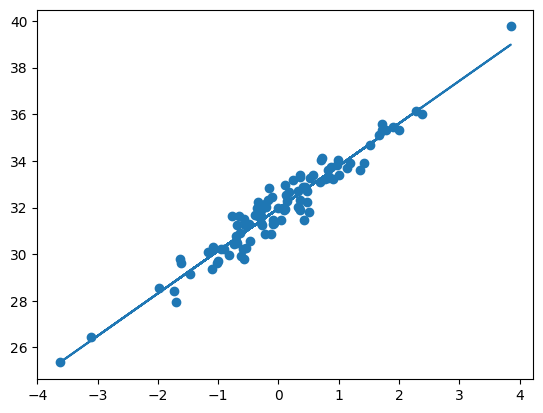

In [116]:
pred = juy_linear_model(x, *params)
plt.scatter(x,y)
plt.plot(x, pred.detach().numpy())
plt.show()

# torch.nn.Linear 모듈을 이용하기.

* `nn.Linear` 는 내부적으로 `y = x @ weight.T + bias` 형태의 연산을 수행.
* `.view(-1,1)`은 PyTorch 에서 `(N, 1)` 형태의 입력을 기대하기 때문임.

In [117]:
import torch
import torch.nn as nn
import torch.optim as optim

# 1.데이터 준비(x,y는 이미 float tensor 형태라고 가정)
x = x.view(-1, 1) #(40,) -> (40, 1)
y = y.view(-1, 1) #(40,) -> (40, 1)

# 2.모델 정의
model = nn.Linear(in_features=1, out_features=1)

# 3.loss func. or optimizer 정의
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

# 4.training loop
n_epoch = 5000
for epoch in range(n_epoch):
  optimizer.zero_grad()

  pred = model(x)
  loss = criterion(pred, y)

  loss.backward()
  optimizer.step()

  if epoch % 1000 == 0:
    print(f"Epoch {epoch}: Loss {loss.item():.4f}")

Epoch 0: Loss 1038.1831
Epoch 1000: Loss 19.1564
Epoch 2000: Loss 0.6311
Epoch 3000: Loss 0.2868
Epoch 4000: Loss 0.2803


최종 손실 (Final Loss): 0.2802
학습된 파라미터:
가중치 w: 1.8221
편향 b: 31.9621


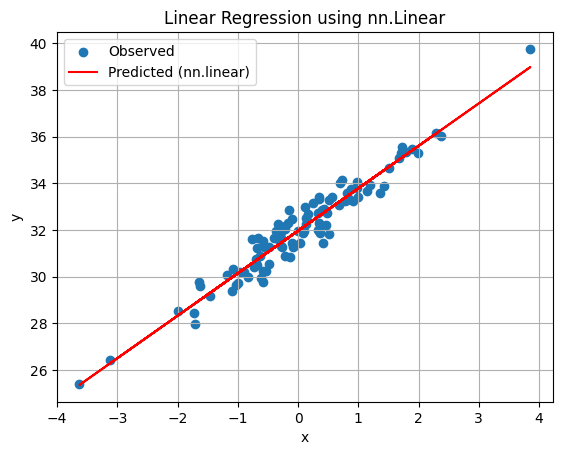

In [118]:
# 예측값 계산(gradient 추적 중지)
with torch.no_grad():
  pred = model(x)

# loss 출력
final_loss = criterion(pred, y)
print(f"최종 손실 (Final Loss): {final_loss.item():.4f}")

# 학습된 파라미터 출력
print("학습된 파라미터:")
print(f"가중치 w: {model.weight.item():.4f}")
print(f"편향 b: {model.bias.item():.4f}")

# 시각화
plt.scatter(x.numpy(), y.numpy(), label='Observed')
plt.plot(x.numpy(), pred.numpy(), color='red', label='Predicted (nn.linear)')
plt.legend()
plt.title("Linear Regression using nn.Linear")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

HW1. 여기에 쓰인 함수들 중 모르는 것들 처음 보는 것들 다 적어서 보고서 형태로

HW2. 애널리스틱형태의 옵셔능로 하면 그대로 돌아가게 한다던지, ipynb 파일 형태로 읽었을 때 책을 읽듯이 읽을 수 있도록 잘 적어서 하기. (특히, nn.linear에 대한 옵션들을 모두 정리하여 하나의 완성된 자료로 만들기(regression 관련으로 해결할 수 있을 정도로)